In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix
from IPython.display import display
import itertools
import os

In [6]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train=np.expand_dims(y_train, axis=1)

In [11]:
y_train.shape

(60000, 1)

In [12]:
y_test.shape

(10000,)

In [13]:
label_names= ['zero','one','two','three','four','five','six','seven','eight','nine']
img_height=28
img_breadth=28
no_class=10
total_input= img_height*img_breadth
val=10000

In [14]:
from tensorflow.keras.preprocessing.image import array_to_img

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
x_train= np.expand_dims(x_train, axis=3)

x_train.shape

(60000, 28, 28, 1)

In [17]:
pic = array_to_img(x_train[0])
pic

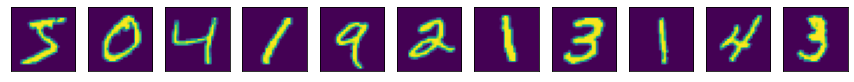

In [18]:
plt.figure(figsize=(15,7))

for i in range(11):
    plt.subplot(1,11,i+1)
    
    plt.imshow(x_train[i])
    
    plt.xticks([])
    plt.yticks([])

In [19]:
y_train[5]

array([2], dtype=uint8)

In [20]:
y_train[4]

array([9], dtype=uint8)

In [23]:
label_names[5]

'five'

In [24]:
y_train[5][0]

2

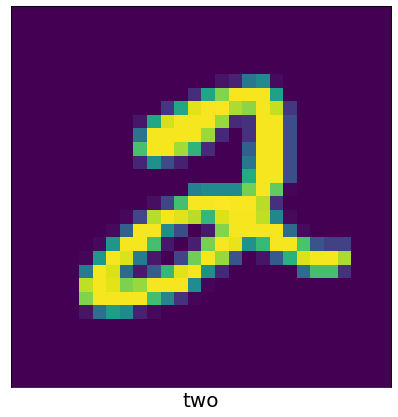

In [26]:
plt.figure(figsize=(15,7))

plt.imshow(x_train[5])
plt.xticks([])
plt.yticks([])
plt.xlabel(label_names[y_train[5][0]], fontsize=20)
plt.show()

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_train= x_train.reshape(x_train.shape[0],total_input)

In [29]:
x_train.shape

(60000, 784)

In [30]:
x_val= x_train[:val]
y_val = y_train[:val]

In [31]:
x_val.shape

(10000, 784)

In [32]:
y_val.shape

(10000, 1)

In [33]:
x_train= x_train[val:]
y_train= y_train[val:]

In [34]:
x_train.shape

(50000, 784)

In [35]:
y_train.shape

(50000, 1)

In [36]:
model_1= Sequential([
    Dense(units=128, input_dim= total_input, activation='relu', name='1st_model_1'),
    Dense(units=68, activation='relu',name='2nd_model_1'),
    Dense(units=16, activation='relu', name='3rd_model_1'),
    Dense(units=10, activation='softmax', name='4th_model_1')
])

In [37]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_model_1 (Dense)         (None, 128)               100480    
                                                                 
 2nd_model_1 (Dense)         (None, 68)                8772      
                                                                 
 3rd_model_1 (Dense)         (None, 16)                1104      
                                                                 
 4th_model_1 (Dense)         (None, 10)                170       
                                                                 
Total params: 110,526
Trainable params: 110,526
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [39]:
nor_epochs=1000
history= model_1.fit(x_train,y_train, epochs= nor_epochs, batch_size=1000, verbose=1,validation_data=(x_val,y_val) )

Epoch 1/1000
50/50 [==============================] - 1s 16ms/step - loss: 6.6800 - accuracy: 0.1803 - val_loss: 2.0054 - val_accuracy: 0.2598
Epoch 2/1000
50/50 [==============================] - 1s 13ms/step - loss: 1.8208 - accuracy: 0.3310 - val_loss: 1.7057 - val_accuracy: 0.4017
Epoch 3/1000
50/50 [==============================] - 1s 13ms/step - loss: 1.5542 - accuracy: 0.4373 - val_loss: 1.4575 - val_accuracy: 0.4860
Epoch 4/1000
50/50 [==============================] - 1s 13ms/step - loss: 1.3162 - accuracy: 0.5165 - val_loss: 1.3017 - val_accuracy: 0.5304
Epoch 5/1000
50/50 [==============================] - 1s 14ms/step - loss: 1.1865 - accuracy: 0.5528 - val_loss: 1.2034 - val_accuracy: 0.5643
Epoch 6/1000
50/50 [==============================] - 1s 15ms/step - loss: 1.1066 - accuracy: 0.5714 - val_loss: 1.1179 - val_accuracy: 0.6155
Epoch 7/1000
50/50 [==============================] - 1s 13ms/step - loss: 1.0199 - accuracy: 0.6104 - val_loss: 1.0630 - val_accuracy: 0.6472

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

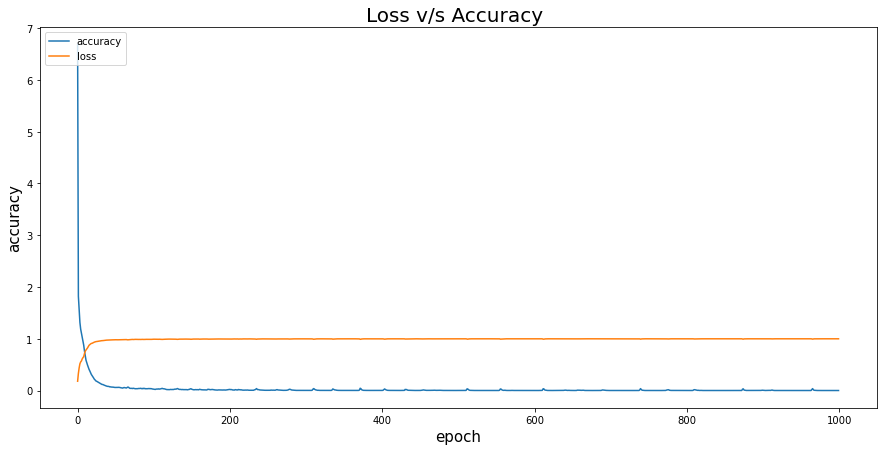

In [41]:
plt.figure(figsize=(15,7))


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title("Loss v/s Accuracy ", fontsize=20)

plt.xlabel("epoch", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(['accuracy','loss'],loc='upper left')

plt.show()

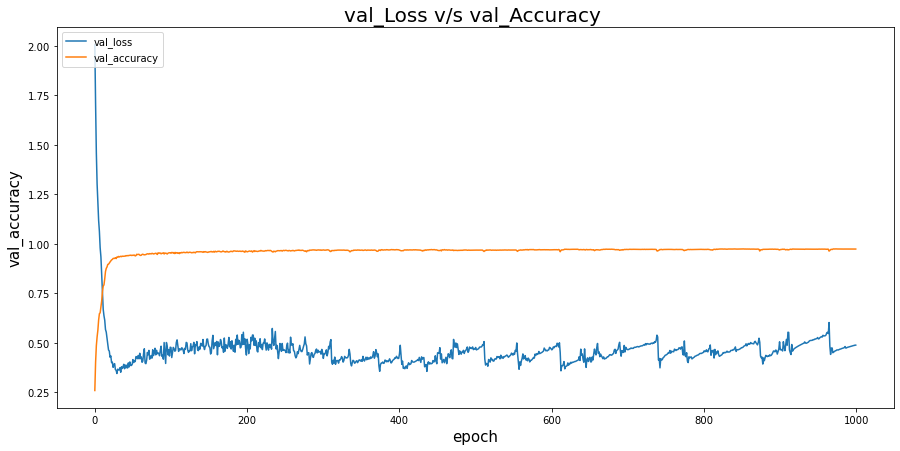

In [42]:
plt.figure(figsize=(15,7))

plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title("val_Loss v/s val_Accuracy ", fontsize=20)

plt.xlabel("epoch", fontsize=15)
plt.ylabel("val_accuracy", fontsize=15)
plt.legend(['val_loss','val_accuracy'],loc="upper left")

plt.show()

In [43]:
x_val[0].shape

(784,)

In [44]:
test= np.expand_dims(x_val[1], axis=0)
test.shape

(1, 784)

In [45]:
x=model_1.predict(test)
x


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
x.shape

(1, 10)

In [47]:
np.argmax(x)

0

In [48]:
x[0][5]

0.0

In [49]:
y_val

array([[5],
       [0],
       [4],
       ...,
       [6],
       [9],
       [7]], dtype=uint8)

In [50]:
y_val[1][0]

0

In [51]:
for i in range(20):
    test=np.expand_dims(x_val[i], axis=0)
    predict=np.argmax(model_1.predict(test))
    
    print(f'Actual value:{y_val[i,0]}, Predicted Value:{predict}')
          
          

Actual value:5, Predicted Value:5
Actual value:0, Predicted Value:0
Actual value:4, Predicted Value:4
Actual value:1, Predicted Value:1
Actual value:9, Predicted Value:9
Actual value:2, Predicted Value:2
Actual value:1, Predicted Value:1
Actual value:3, Predicted Value:3
Actual value:1, Predicted Value:1
Actual value:4, Predicted Value:4
Actual value:3, Predicted Value:3
Actual value:5, Predicted Value:5
Actual value:3, Predicted Value:3
Actual value:6, Predicted Value:6
Actual value:1, Predicted Value:1
Actual value:7, Predicted Value:7
Actual value:2, Predicted Value:2
Actual value:8, Predicted Value:8
Actual value:6, Predicted Value:6
Actual value:9, Predicted Value:9


In [52]:
x_test.shape

(10000, 28, 28)

In [53]:
x_test= x_test.reshape(x_test.shape[0],total_input)

In [54]:
x_test.shape

(10000, 784)

In [55]:
test_loss,test_accuracy= model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.9726


In [56]:
predict= np.argmax(model_1.predict(x_test), axis=1)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [57]:
predict.shape

(10000,)

In [58]:
conf_matrix= confusion_matrix(y_true=y_test, y_pred= predict)

In [59]:
conf_matrix

array([[ 970,    0,    2,    1,    0,    2,    4,    1,    0,    0],
       [   0, 1122,    2,    1,    0,    1,    1,    1,    5,    2],
       [   6,    2,  999,    4,    1,    1,    2,    7,   10,    0],
       [   0,    0,    4,  978,    0,   14,    0,    4,    7,    3],
       [   0,    1,    4,    0,  951,    0,    9,    1,    2,   14],
       [   5,    0,    1,   15,    1,  857,    3,    1,    6,    3],
       [  11,    2,    5,    2,    2,    2,  933,    0,    1,    0],
       [   0,    6,    6,    2,    3,    0,    1, 1003,    3,    4],
       [   3,    1,    5,    3,    2,    7,    0,    5,  943,    5],
       [   2,    9,    0,    5,    9,    4,    0,    6,    4,  970]],
      dtype=int64)

In [60]:
conf_matrix.shape

(10, 10)

In [61]:
nor_rows=conf_matrix.shape[0]
nor_col=conf_matrix.shape[1]

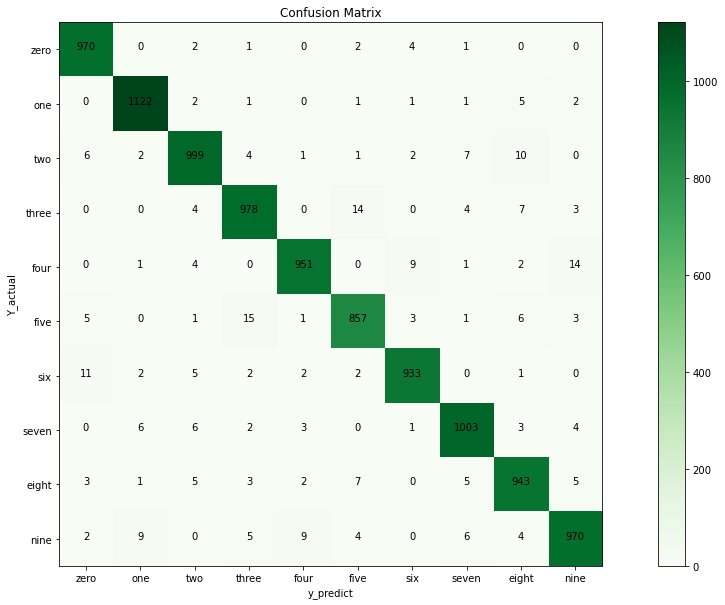

In [63]:
plt.figure(figsize=(20,10))
plt.imshow(conf_matrix , cmap=plt.cm.Greens)

plt.title('Confusion Matrix')
plt.xlabel('y_predict')
plt.ylabel('Y_actual')

for i, j in itertools.product(range(nor_rows),range(nor_col)):
    plt.text(j,i , conf_matrix[i,j], horizontalalignment='center')
tick_marks=np.arange(no_class)

plt.xticks(tick_marks,label_names)
plt.yticks(tick_marks,label_names)
plt.colorbar()
plt.show()

In [64]:
np.diag(conf_matrix)

array([ 970, 1122,  999,  978,  951,  857,  933, 1003,  943,  970],
      dtype=int64)

In [65]:
recal= np.diag(conf_matrix)/ np.sum(conf_matrix, axis=0)

In [66]:
recal

array([0.97291876, 0.9816273 , 0.97178988, 0.96735905, 0.98142415,
       0.96509009, 0.97901364, 0.97473275, 0.96126402, 0.96903097])

In [67]:
precision= np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)

In [68]:
precision

array([0.98979592, 0.98854626, 0.96802326, 0.96831683, 0.96843177,
       0.96076233, 0.97390397, 0.97568093, 0.96817248, 0.96134787])

In [69]:
avg_recal= np.mean(recal)
avg_recal

0.9724250601984297

In [70]:
avg_precision=np.mean(precision)
avg_precision

0.9722981619329947

In [71]:
f1_score= 2*(avg_precision*avg_recal)/ (avg_precision+avg_recal)

In [72]:
f1_score

0.9723616069254907